In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from warnings import filterwarnings

filterwarnings('ignore')

sns.set_style('darkgrid')

In [2]:
breast_df = pd.read_csv('./data.csv')

In [3]:
pd.set_option('display.max_rows', 100)

In [4]:
breast_df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [5]:
breast_df.shape

(569, 33)

In [6]:
breast_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

The dataset contains 569 observations with 33 features.

In [7]:
breast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### CHECKING FOR MISSING VALUES IN THE DATASET

In [8]:
breast_df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

It appears as though all of the feature columns has no missing values except the last column '_Unnamed: 32_' which has all of its values missing, hence we drop this column.

In [9]:
breast_df.drop(['Unnamed: 32'], axis= 1,inplace=True)

In [10]:
breast_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Now, we can verify that the last column (consisting of all missing values has been successfully removed from the dataframe). Also, the '_id_' feature  will be irrelevant for the model training and prediction thereof hence we drop this column as well.

In [11]:
breast_df.drop(['id'], axis=1, inplace=True)

In [12]:
breast_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


The different range of values for the numeric columns informs that we must scale the data before building any model.

Now, let us determine the number of unique values in each column.

In [13]:
breast_df.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

Almost all the columns have more unique values which makes sense as mmost of these columns are continuous. The '_diagnosis_' column however has only two unique values and they are; _benign_ and _malignant._ We inspect this feature more closely. 

In [14]:
breast_df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

'_M_' corresponds to malignant (cancerous cells)  
'_B_' corresponds to benign (non cancerous cells)

In [15]:
breast_df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

Out of the 569 observations, 357 are diagnosed as benign (non cancerous) and 212 as malignant (cancerous).

In [16]:
breast_df['diagnosis'].value_counts(normalize=True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

In terms of percentages, approximately 63% are benign and 37% are malignant.

Text(0.5, 1.0, 'Count of of Benign and Malignant diagnosed cells')

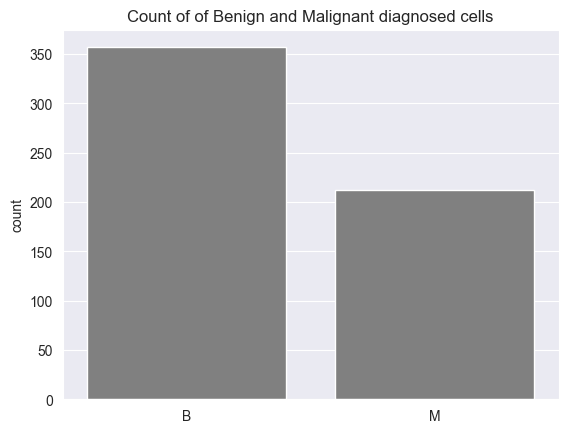

In [17]:
sns.barplot(x=breast_df['diagnosis'].unique()[::-1], y=breast_df['diagnosis'].value_counts(), color='gray')
plt.title('Count of of Benign and Malignant diagnosed cells')

In [18]:
# sns.pairplot(breast_df, hue='diagnosis', kind='kde')

In [19]:
breast_df.columns


Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Selecting the target feature

In [20]:
target = breast_df.diagnosis
target

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [21]:
first_subset_df = breast_df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
first_subset_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


Now, we use the melt method of the pandas library to reshape the dataset.

In [22]:
first_melt_df = pd.melt(first_subset_df, id_vars=['diagnosis'], var_name='features', value_name='value')
first_melt_df

,diagnosis,features,value
0,M,radius_mean,17.99000
1,M,radius_mean,20.57000
2,M,radius_mean,19.69000
3,M,radius_mean,11.42000
4,M,radius_mean,20.29000
...,...,...,...
5685,M,fractal_dimension_mean,0.05623
5686,M,fractal_dimension_mean,0.05533
5687,M,fractal_dimension_mean,0.05648
5688,M,fractal_dimension_mean,0.07016


Now, we use the violin plot to check the distribution of each of these features.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

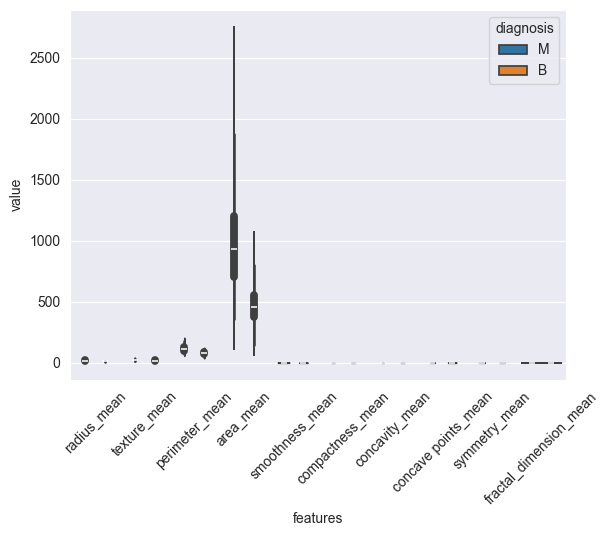

In [23]:
sns.violinplot(data=first_melt_df, x='features', y='value', inner='box', hue='diagnosis')
plt.xticks(rotation=45)

As we can see, the plot above does not give us a nice graph for interpretation. This is as a result of the different ranges in the features. To solve this problem, we standardize the data.

In [24]:
numerical_columns = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

scaler = StandardScaler()
scaler.fit(breast_df[numerical_columns])
breast_df[numerical_columns]= scaler.transform(breast_df[numerical_columns])
breast_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,M,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,M,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,M,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


Now, we go ahead and repeat the same process

In [25]:
first_sub = breast_df[['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

In [26]:
first_df_melt = pd.melt(first_sub, id_vars='diagnosis', value_name='value', var_name='features')
first_df_melt

,diagnosis,features,value
0,M,radius_mean,1.097064
1,M,radius_mean,1.829821
2,M,radius_mean,1.579888
3,M,radius_mean,-0.768909
4,M,radius_mean,1.750297
...,...,...,...
5685,M,fractal_dimension_mean,-0.931027
5686,M,fractal_dimension_mean,-1.058611
5687,M,fractal_dimension_mean,-0.895587
5688,M,fractal_dimension_mean,1.043695


Text(0.5, 1.0, 'Distribution of mean features via diagnosis')

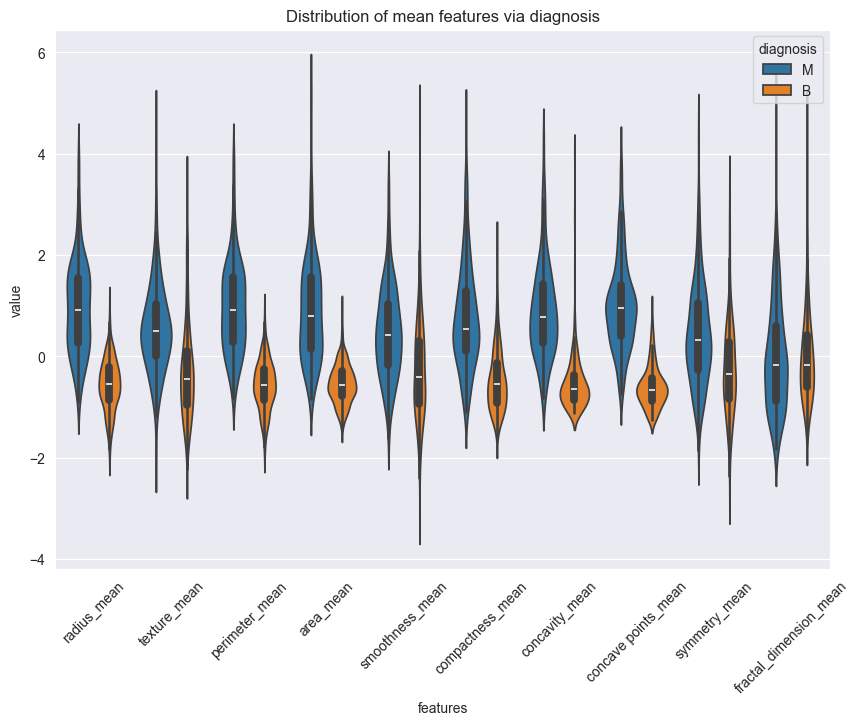

In [27]:
plt.figure(figsize=(10,7))
sns.violinplot(data=first_df_melt, x='features', y='value', hue='diagnosis', inner='box')
plt.xticks(rotation=45)
plt.title('Distribution of mean features via diagnosis')

From the plot abve, we can see that almost all the the features seem to have different median values for the benign and malignant whereas the '_fractal dimension mean_' column has the same median value for the benign and malignant which indicates that this column cannot clearly help classifying whether a cell is benign or malignant. 

Now we move on to the second subset (standard errors)

In [28]:
breast_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [29]:
second_sub = breast_df[['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']]

second_sub = pd.concat([target, second_sub], axis=1)
second_sub

,diagnosis,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,M,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083
1,M,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444
2,M,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559
3,M,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511
4,M,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328
...,...,...,...,...,...,...,...,...,...,...,...
564,M,2.782080,0.071025,2.379583,2.604187,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980
565,M,1.300499,2.260938,1.156857,1.291565,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556
566,M,0.184892,-0.257371,0.276693,0.180698,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727
567,M,1.157935,0.686088,1.438530,1.009503,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057


In [30]:
second_df_melt = pd.melt(second_sub, id_vars='diagnosis', var_name='features', value_name='value')
second_df_melt

,diagnosis,features,value
0,M,radius_se,2.489734
1,M,radius_se,0.499255
2,M,radius_se,1.228676
3,M,radius_se,0.326373
4,M,radius_se,1.270543
...,...,...,...
5685,M,fractal_dimension_se,0.167980
5686,M,fractal_dimension_se,-0.490556
5687,M,fractal_dimension_se,0.036727
5688,M,fractal_dimension_se,0.904057


Text(0.5, 1.0, 'Distribution of standard error features via diagnosis')

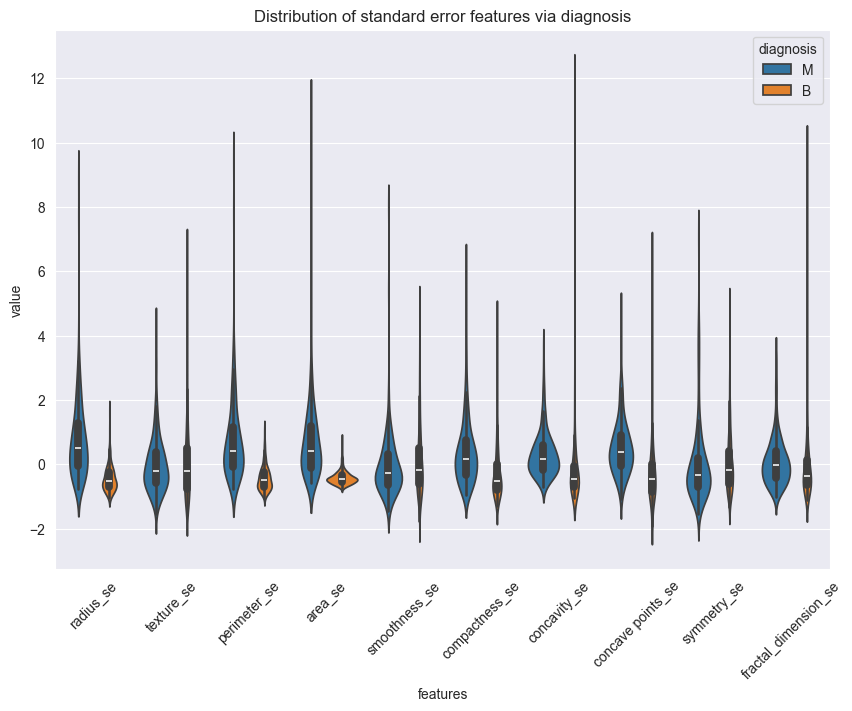

In [31]:
plt.figure(figsize=(10,7))
sns.violinplot(second_df_melt, x='features', y='value', hue='diagnosis', inner='box')
plt.xticks(rotation=45)
plt.title('Distribution of standard error features via diagnosis')

In this plot, we observe that the median values for the '_texture area se, smoothness se, and symmetry se_' are almost the same hence it might be difficut to correctly classify using these features. 

In [32]:
breast_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [33]:
third_sub = breast_df[['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
third_sub = pd.concat([target, third_sub], axis=1)

third_df_melt = pd.melt(third_sub, id_vars='diagnosis', var_name='features', value_name='value')
third_df_melt

,diagnosis,features,value
0,M,radius_worst,1.886690
1,M,radius_worst,1.805927
2,M,radius_worst,1.511870
3,M,radius_worst,-0.281464
4,M,radius_worst,1.298575
...,...,...,...
5685,M,fractal_dimension_worst,-0.709091
5686,M,fractal_dimension_worst,-0.973978
5687,M,fractal_dimension_worst,-0.318409
5688,M,fractal_dimension_worst,2.219635


Text(0.5, 1.0, 'Distribution of worst features via diagnosis')

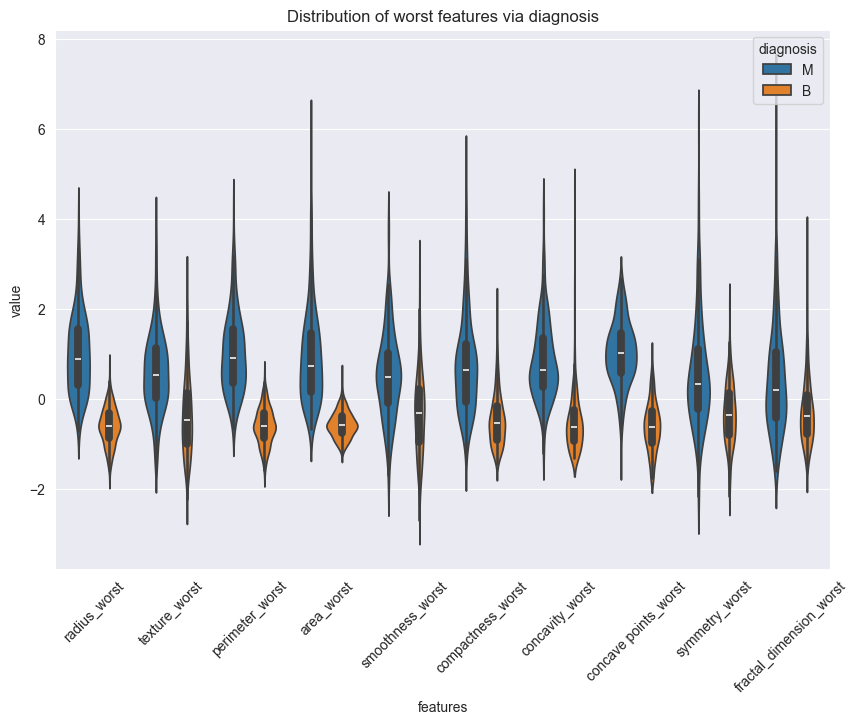

In [34]:
plt.figure(figsize=(10,7))
sns.violinplot(third_df_melt, x='features', y='value', hue='diagnosis', inner='box')
plt.xticks(rotation=45)
plt.title('Distribution of worst features via diagnosis')

The median values of all the features in this subset are significantly different hence it might be useful to use these features in building the classification model.

We now use the swarmplot to visualize the distribution of each feature and check if they are good for classifying the cells.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

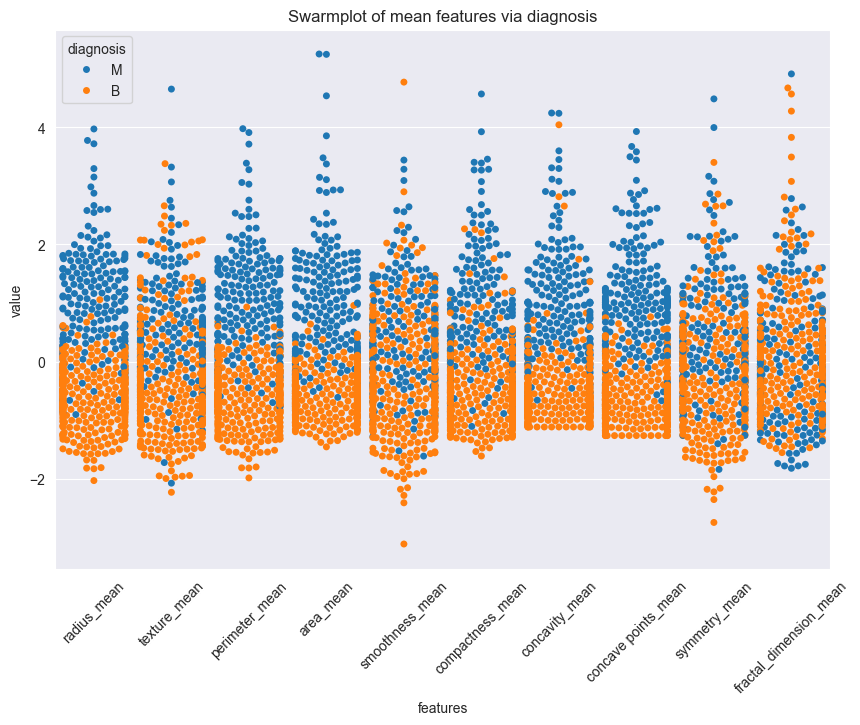

In [35]:
plt.figure(figsize=(10,7))
sns.swarmplot(data=first_df_melt, x='features', y='value', hue='diagnosis')
plt.title('Swarmplot of mean features via diagnosis')
plt.xticks(rotation=45)

Checking the plot for the first subset, we can see that the '_radius mean, perimeter mean, area mean, concavity mean, concave points mean_' columns provide a clear separation between the benign (orange) and malignant (blue) cells. This could mean that these features might be used to build a more robust classification model.   

Moving on to the second subset

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

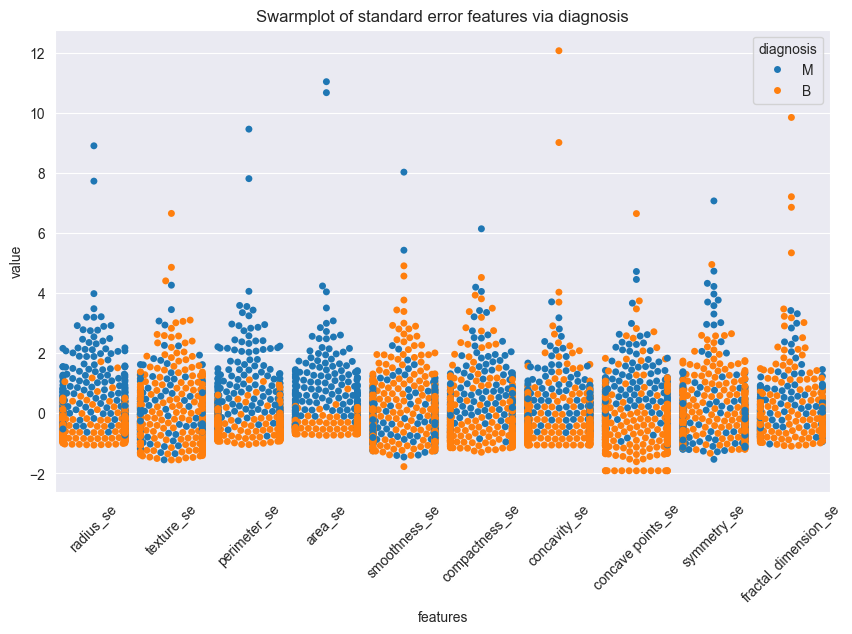

In [36]:
plt.figure(figsize=(10,6))
sns.swarmplot(data=second_df_melt, x='features', y='value', hue='diagnosis')
plt.title('Swarmplot of standard error features via diagnosis')
plt.xticks(rotation=45)

From the second subset, only the '_area se_' column seems to provide a somewhat clear distinction between the two classes.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

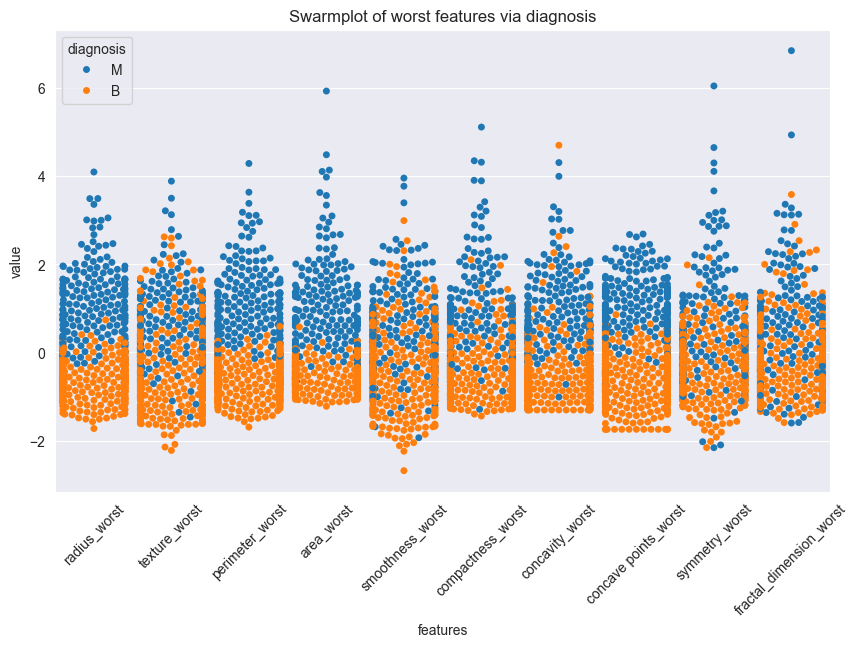

In [37]:
plt.figure(figsize=(10,6))
sns.swarmplot(data=third_df_melt, x='features', y='value', hue='diagnosis')
plt.title('Swarmplot of worst features via diagnosis')
plt.xticks(rotation=45)

In the last subset, the '_radius worst, perimeter worst, area worst and concave points worst_' columns are the ones that give a clear distinction between the benign and malignant classes.

Now we plot the correlation matrix to determine whether some of these features are highly correlated.


<Axes: >

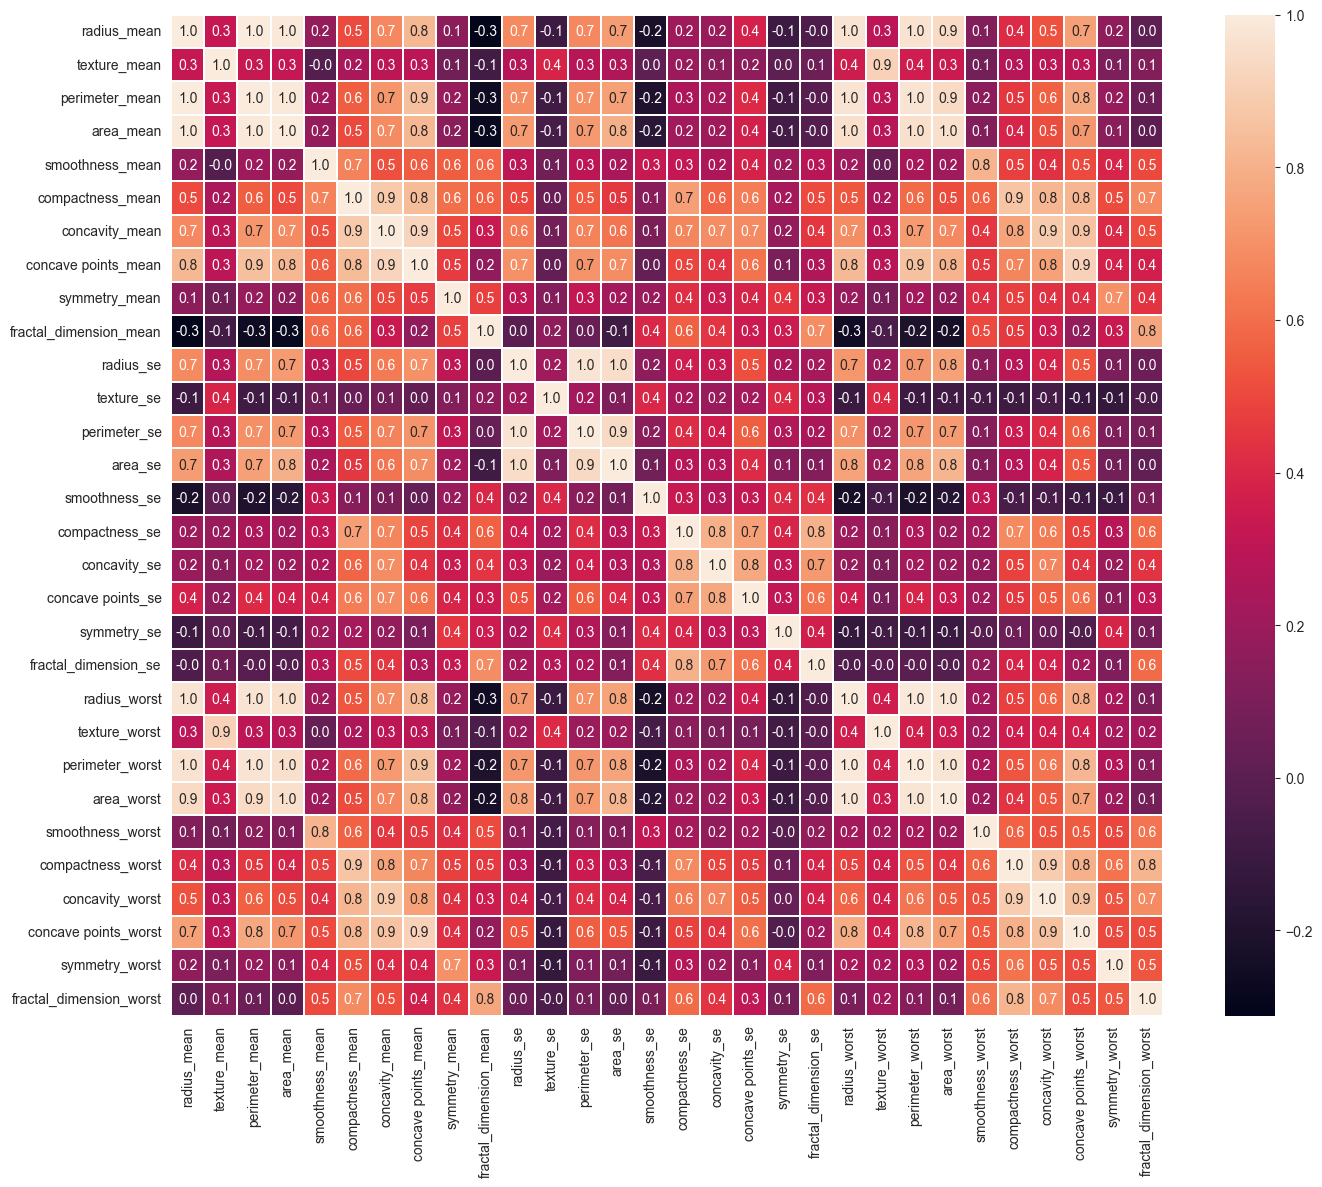

In [38]:
inputs_df = breast_df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

plt.figure(figsize=(16,13))
sns.heatmap(inputs_df.corr(), annot=True, fmt='.1f', linewidth=0.2)

From the heatmap above, we can see that the '_radius mean, perimeter mean, and area mean_' columns are highly correlated so I  will keep only the '_area mean_' column. This because in the first swarmplot, we can see that the this feature has a clear distinction between the benign and malignant cells and will be good for classifying new cells.


Similarly, we can see a very high correlation between the '_radius mean, radius worst, perimeter worst, and area worst_' columns hence I keep the '_area worst_' column.   


Again, we can see that the '_compactness mean, concavity mean, concave points mean_' columns are highly correkated hence I keep the '_concave points mean_' column since it seem to have a clear separation between benign and malignant columns.

The '_radius se, perimeter se, and area se_' columns are correlated so I choose the '_area se_' column.

'_Compactness worst, concavity worst, concave points worst_' seem to be highly correlated so I choose the '_concave points worst._'

Now, '_texture mean_' seems to be highly correlated with '_texture worst_' so I keep the '_texture worst_' column since is seem to have a slightly better separation than '_texture mean_'.

Lastly,  '_area mean_' seems to be highly correlated with '_area worst._'

<Axes: >

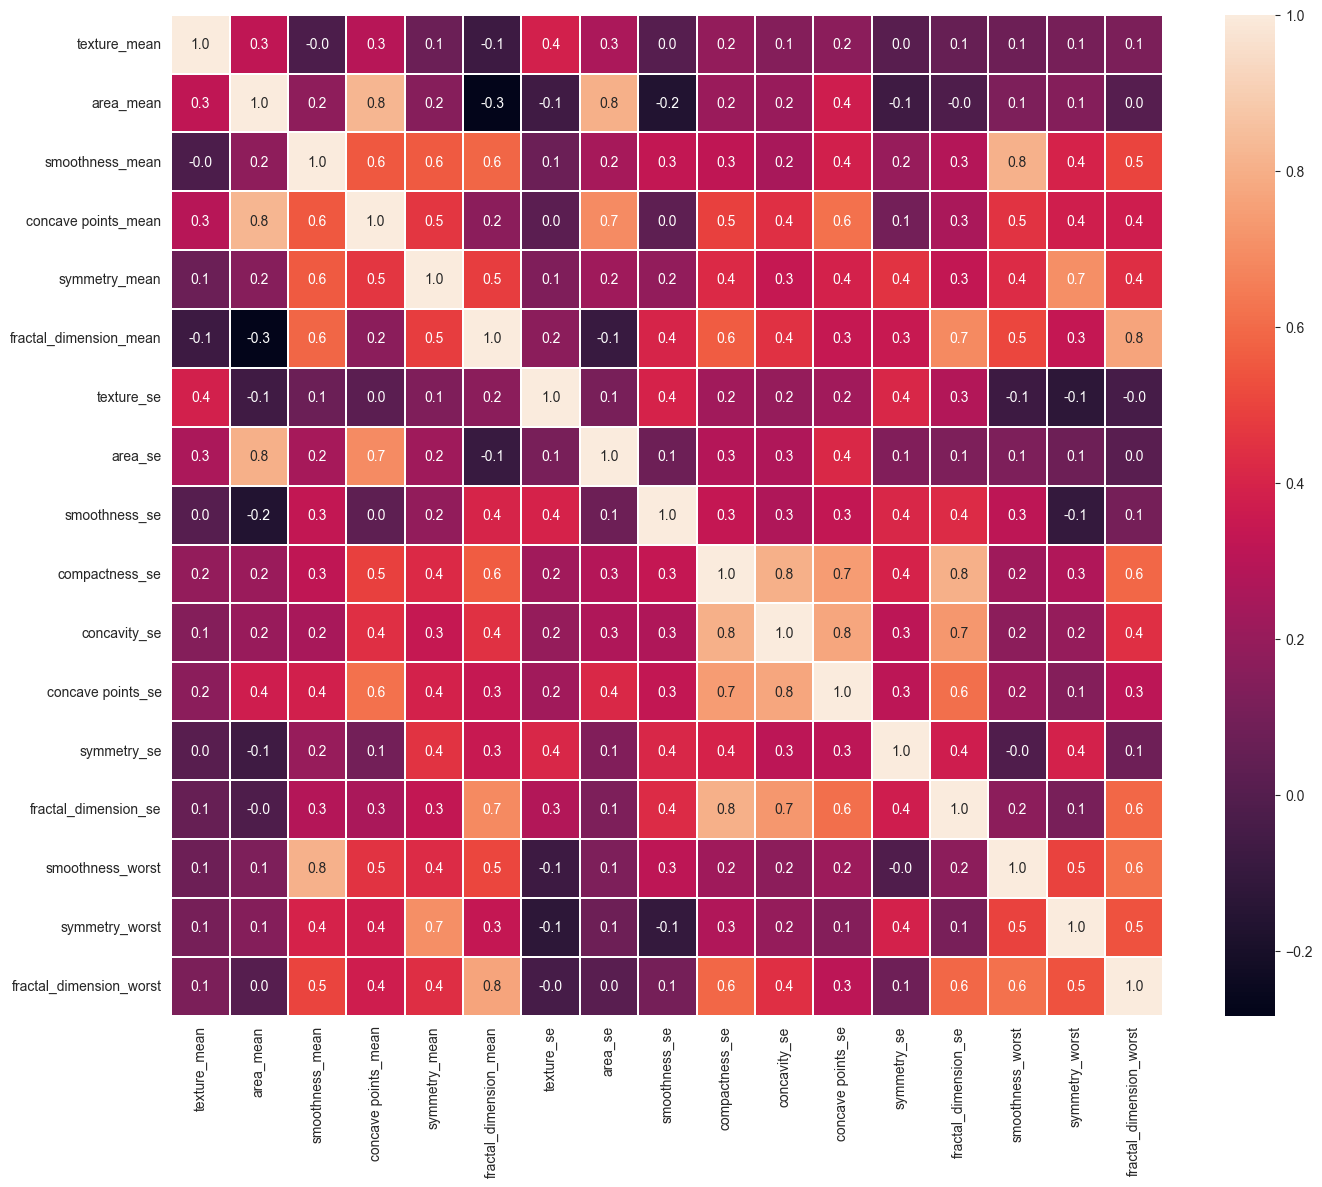

In [39]:
new_inputs_df = breast_df[['texture_mean', 'area_mean', 'smoothness_mean', 
        'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

plt.figure(figsize=(16,13))
sns.heatmap(new_inputs_df.corr(), annot=True, fmt='.1f', linewidth=0.2)

Now, I use the remaining features to build the classification model.

### MODEL BUILDING

I split the dataset into training and test datasets

In [40]:
target.shape

(569,)

In [41]:
train_feat, test_feat, train_target, test_target = train_test_split(new_inputs_df, target, test_size=0.2, random_state=5)

In [42]:
print(f"Training features: {train_feat.shape}")
print(f"Training target: {train_target.shape}")
print(f"Test features: {test_feat.shape}")
print(f"Test target: {test_target.shape}")

Training features: (455, 17)
Training target: (455,)
Test features: (114, 17)
Test target: (114,)


Now, we encode the diagnosis column

In [43]:
target_df = pd.DataFrame(train_target, columns=['diagnosis'])

# encoder = OneHotEncoder()
# encoder.fit(target_df)

# encoder_name = encoder.get_feature_names_out()
# target_df[encoder_name] = encoder.transform(target_df).toarray()
# target_df.drop(['diagnosis_B', 'diagnosis_M'], inplace=True, axis=1)dd

Now we build the classification model.

In [44]:
model = LogisticRegression()

In [45]:
model.fit(train_feat, train_target)

LogisticRegression()

In [46]:
model.coef_

array([[ 1.29503819,  2.02329538, -0.08510387,  2.17182109, -0.29094832,
        -0.97864646,  0.07164415,  2.19972498, -0.12135687, -0.49847159,
         0.88986953,  0.56715051, -0.67357312, -1.02961732,  1.1243281 ,
         1.34840546,  0.98425809]])

Using the model to make predictions on the test set 

In [47]:
test_pred = model.predict(test_feat)
test_pred

array(['M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M'], dtype=object)

Now, I check the accuracy of the model and the confusion matrix

The accuracy score is given by

$$\frac{TP + TN}{TP + TN + FP + FN}.$$

It is measure of the right (accurate) predictions over all prediction.

In [48]:
accuracy = accuracy_score(test_target, test_pred)
print(f"The model has accuracy score: {accuracy*100:.2f}%")

The model has accuracy score: 97.37%


The model has an accuracy score of 97.37% when used to predict the test set.

Now, we plot the confusion matrix.

In [49]:
pd.DataFrame(test_pred).value_counts()

B    67
M    47
Name: count, dtype: int64

Text(0.5, 1.0, 'Test Confusion Matrix')

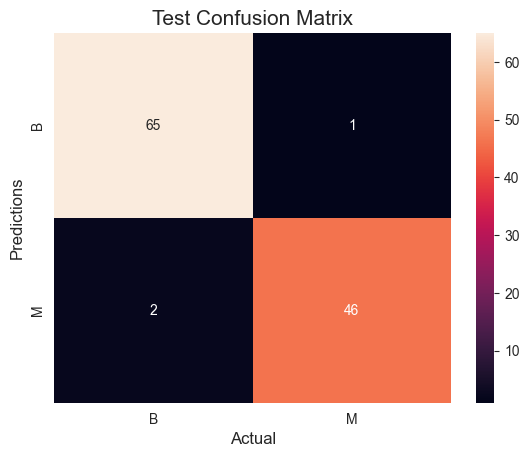

In [50]:
cm = confusion_matrix(test_target, test_pred, labels=['B', 'M'])
sns.heatmap(cm, xticklabels=['B', 'M'], yticklabels=['B','M'], annot=True)
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predictions', fontsize=12)
plt.title('Test Confusion Matrix', fontsize=15)


In the confusion matrix above, 0 represents benign classification ('_B_') and 1 represents the malignant classification ('M'). We can see that the model predicted '_B_' 98% accurately and '_M_' 96% accurately.

The precision score is given by 

$$\frac{TP}{TP + FP}.$$

It is the ratio of the true positive predictions over the total positive predictions

In [51]:
precision = precision_score(test_target, test_pred, pos_label='M')
print(f"The precision of the model is {precision*100:.2f}%")

The precision of the model is 97.87%


This implies that 97.87% of the positive prediction (classifying as malignant) by the model are actually true.

The recall is given by

$$\frac{TP}{TP + FN}.$$

It is the ratio of true positive predictions to the actual positive obaservations.

In [52]:
recall = recall_score(test_target, test_pred, pos_label='M')
print(f"The recall of the model is {recall*100:.2f}%")

The recall of the model is 95.83%


This implies that the model accurately predicts 95.83% out of the actual ositive observations.

The F1 Score is used to evaluate the overall performance of the classification model.

In [53]:
f1 = f1_score(test_target, test_pred, pos_label='M')
print(f"The f1 score of the model: {f1*100:.2f}%")

The f1 score of the model: 96.84%


### CONCLUSION

I was able to build a classification model with a 97.73% accuracy of classifying whether the cells are benign or malignant.